<a href="https://colab.research.google.com/github/imchihchao/aop113b/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：社群軟體使用調查

## 摘要

本報告基於之前使用過的練習資料集，進行統計推論與探索性分析，探討年輕人社群軟體使用習慣及感受

## 引言

### 背景
社群軟體盛行，大大影響人們的交友與行為，尤其threads、discord等程式流行於年輕人之間。

### 目的
目標是透過分析問卷回應，在年輕人的社群軟體使用習慣與回饋進行探索性分析和統計推論

### 待答問題
1. 情感(認同感、分享欲等)與軟體使用習慣之間是否存在關係？
2. 不同性別的使用者，在使用軟體習慣上有無顯著差異？
3. 情感會不會影響使用者行為?

## 方法

### 數據來源
使用以前上課講師提供的數據集，該數據集包含問券回應者的基本人口特徵與軟體使用習慣、感受。已經過講師同意授權使用

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）
- **scipy.stats**（統計分析）

### 數據處理
1. 載入 `social_media` 數據集並檢視數據概況。
2. 探索性數據分析（EDA）以了解數據分佈與異常值。
3. 繪製散點圖、長條圖、盒狀圖等，分析關鍵變數之間的關係。
4. 相關性與線性回歸


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind, levene, linregress
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-06-17 15:19:33--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.111.139, 142.251.111.138, 142.251.111.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-17 15:19:33--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-06-17 

In [ ]:
data = pd.read_csv('social_media.csv')
data = data[data["此題請填4，否則問卷無效"] == 4]
data = data.drop(columns=["此題請填4，否則問卷無效"]).dropna(how = "any")
data

,生理性別,年紀,Facebook,Instagram,LINE,Discord,TikTok,Dcard,平均每日社群軟體使用時間,我更偏好使用什麼軟體「訊息他人」？,...,我有被遺忘的感覺,我覺得沒有人能真正理解我,覺得身邊的人讓我感到陌生,孤獨感,我很滿意目前的現實人際關係,比起現實生活，網路上的我更有存在感,社交軟體就像我的第二個家,我認為我在社交軟體上比在現實生活中還受到重視,我很滿意我目前網路上的人際關係,滿意度
1,男性,22.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,LINE,...,4.0,1.0,2.0,10.0,4.0,4.0,3.0,2.0,4.0,9.0
2,男性,22.0,2.0,2.0,2.0,1.0,3.0,1.0,9.0,LINE,...,2.0,2.0,2.0,8.0,4.0,5.0,5.0,5.0,5.0,16.0
3,女性,20.0,1.0,5.0,2.0,0.0,0.0,1.0,7.0,LINE,...,2.0,4.0,1.0,9.0,3.0,1.0,1.0,1.0,2.0,2.0
4,男性,21.0,2.0,2.0,3.0,1.0,0.0,0.0,5.0,Facebook,...,3.0,4.0,2.0,13.0,3.0,2.0,3.0,2.0,4.0,8.0
5,男性,21.0,4.0,4.0,2.0,3.0,3.0,1.0,7.0,Instagram,...,5.0,4.0,4.0,17.0,5.0,5.0,4.0,4.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,女性,21.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,LINE,...,2.0,3.0,1.0,8.0,4.0,3.0,3.0,3.0,3.0,8.0
327,女性,21.0,2.0,1.0,1.0,0.0,0.0,1.0,3.0,LINE,...,2.0,1.0,1.0,6.0,4.0,2.0,3.0,2.0,4.0,7.0
328,女性,21.0,2.0,2.0,2.0,2.0,0.0,2.0,5.0,LINE,...,4.0,4.0,4.0,16.0,2.0,4.0,4.0,4.0,3.0,13.0
329,女性,18.0,2.0,3.0,2.0,0.0,0.0,1.0,5.0,LINE,...,2.0,3.0,1.0,8.0,4.0,2.0,1.0,2.0,4.0,5.0


## 結果與分析

### 敘述統計
基本的統計量

In [ ]:
col = "年紀"
print(f"平均:\t{data[col].mean():.2f}")
print(f"標準差:\t{data[col].std():.2f}")
print(f"中位數:\t{data[col].median():.2f}")
print(f"眾數:\t{data[col].mode().values[0]}")
print(f"最大值:\t{data[col].max()}")
print(f"最小值:\t{data[col].min()}")
print(f"Q1:\t{data[col].quantile(0.25)}")
print(f"Q3:\t{data[col].quantile(0.75)}")

平均:	20.71
標準差:	2.74
中位數:	20.00
眾數:	20.0
最大值:	45.0
最小值:	16.0
Q1:	19.0
Q3:	21.0


In [ ]:
print(data.groupby("生理性別")["年紀"].mean().round(2))
print(data.groupby("生理性別")["年紀"].max())
print(data.groupby("生理性別")["年紀"].min())

生理性別
女性    20.56
男性    20.95
Name: 年紀, dtype: float64
生理性別
女性    41.0
男性    45.0
Name: 年紀, dtype: float64
生理性別
女性    18.0
男性    16.0
Name: 年紀, dtype: float64


**分析結果**：資料的族群較為年輕

### 社群軟體的男女分布
資料集中每種社群軟體的男女使用比例

In [ ]:
gender_dist = pd.crosstab(
    index=data["綜合來說我最喜歡什麼社交軟體？"],
    columns=data["生理性別"],
    normalize='index'
).round(2)

print("社群軟體的男女使用比例：")
print(gender_dist)

社群軟體的男女使用比例：
生理性別               女性    男性
綜合來說我最喜歡什麼社交軟體？            
Dcard            0.67  0.33
Discord          0.39  0.61
Facebook         0.42  0.58
Instagram        0.65  0.35
LINE             0.67  0.33
TikTok           0.50  0.50
其他               0.73  0.27


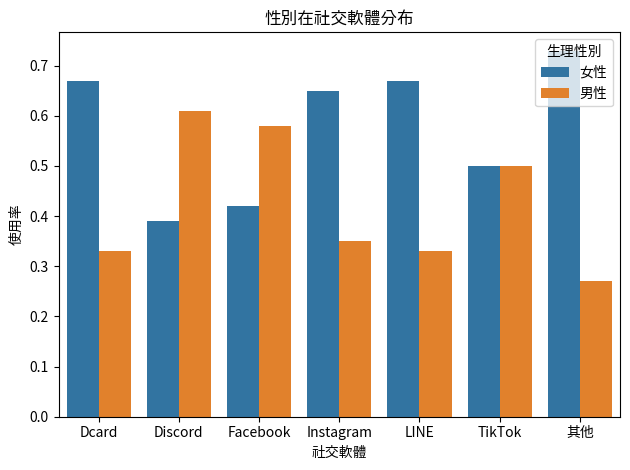

In [ ]:
gender_dist_long = gender_dist.reset_index().melt(id_vars="綜合來說我最喜歡什麼社交軟體？",
          var_name="生理性別", value_name="比例")

sns.barplot(data=gender_dist_long,
            x="綜合來說我最喜歡什麼社交軟體？",
            y="比例",
            hue="生理性別")
plt.title("性別在社交軟體分布")
plt.ylabel("使用率")
plt.xlabel("社交軟體")

plt.tight_layout()
plt.show()

**分析結果**：dcard、line、instergram在性別上有比較明顯的偏好傾向

### T檢定 Student's t-test
用途: 比較兩組樣本的平均值是否有顯著差異  
前提: 兩組樣本之變異數相等  
應對方案: 使用 Welch's t-test

In [ ]:
male = data[data["生理性別"] == "男性"]
female = data[data["生理性別"] == "女性"]

male_recog = male["認同度"]
female_recog = female["認同度"]

switch = levene(male_recog, female_recog)
if switch.pvalue < 0.05:
    t, p = ttest_ind(male_recog, female_recog, equal_var=False)
    print("兩組變異數不相等，使用Welch's t-test")
else:
    t, p = ttest_ind(male_recog, female_recog, equal_var=True)
    print("兩組變異數相等，使用Student's t-test")

print(f"t = {t:.2f}, p = {p:.4f}")
if p < 0.05:
    print("拒絕虛無假設，兩組平均數有顯著差異")

兩組變異數相等，使用Student's t-test
t = -0.35, p = 0.7293


**分析結果**：
- 無拒絕虛無假設，性別在認同度上無顯著差異

###相關分析 Correlation Analysis

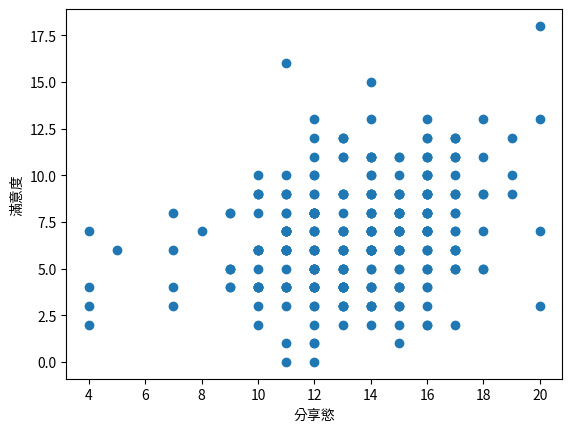

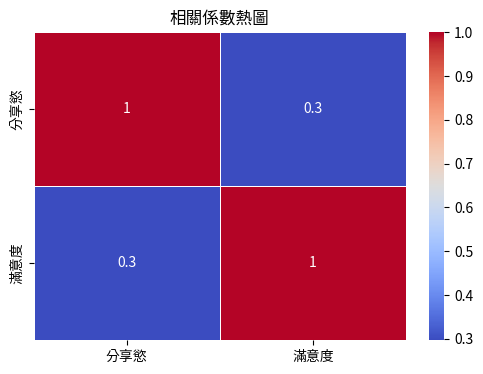

     分享慾  滿意度
分享慾  1.0  0.3
滿意度  0.3  1.0
      分享慾   滿意度
分享慾  1.00  0.28
滿意度  0.28  1.00
      分享慾   滿意度
分享慾  1.00  0.21
滿意度  0.21  1.00


In [ ]:
plt.scatter(data["分享慾"], data["滿意度"])
plt.xlabel("分享慾")
plt.ylabel("滿意度")
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(data[["分享慾", "滿意度"]].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("相關係數熱圖")
plt.show()
print(data[["分享慾", "滿意度"]].corr(method='pearson').round(2))
print(data[["分享慾", "滿意度"]].corr(method='spearman').round(2))
print(data[["分享慾", "滿意度"]].corr(method='kendall').round(2))

###線性回歸 Linear Regression
找出一條「最佳擬合線」

迴歸式：y = 0.43x + 7.11 (R=0.33, p=0.0000)


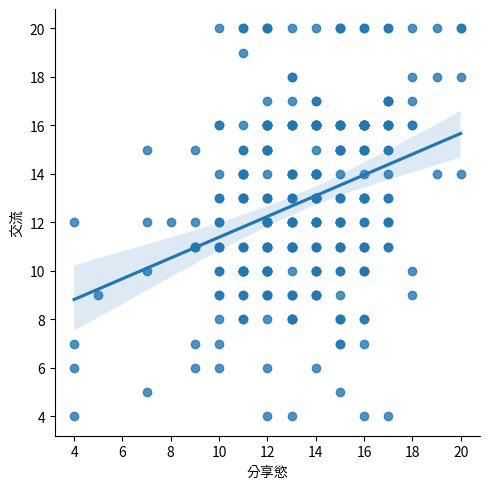

In [ ]:
from scipy.stats import linregress
import seaborn as sns

x = data["分享慾"]
y = data["交流"]

slope, intercept, r, p, stderr = linregress(x, y)
print(f"迴歸式：y = {slope:.2f}x + {intercept:.2f} (R={r:.2f}, p={p:.4f})")

sns.lmplot(x="分享慾", y="交流", data=data)


## 結論與建議


### 結論
1. 性別在社交軟體的認同度無明顯差異。
2. 軟體的滿意度和分享欲沒有明顯相關。
3. 分享欲會顯著正向影響交流行為。



